In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [14]:
f = h5py.File('data/drone_sim/sunny.hdf5')
traj = f['trajectory_0005']
# GPS
gps_pos = traj['gps']['position']
gps_vel = traj['gps']['velocity']
# Ground truth
gnd_pos = traj['groundtruth']['position']
gnd_vel = traj['groundtruth']['velocity']
gnd_att = traj['groundtruth']['attitude']
# IMU unit
imu_acc = traj['imu']['accelerometer']
imu_gyr = traj['imu']['gyroscope']

In [21]:
print(gnd_pos.shape)

(8821, 3)


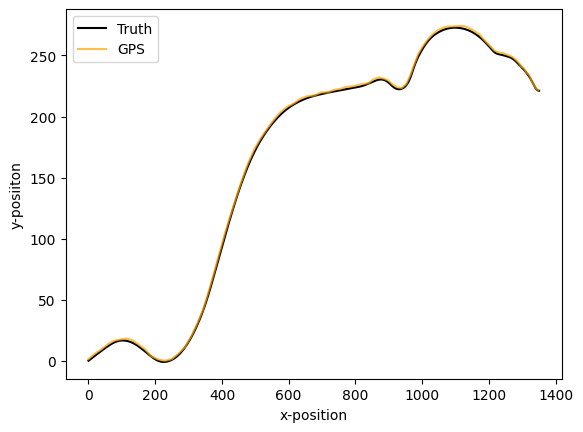

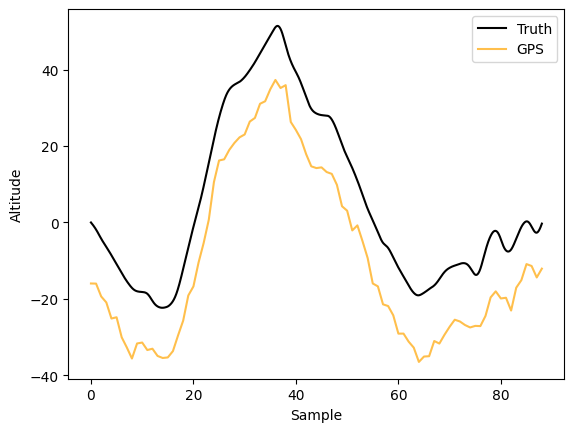

In [22]:
plt.figure()
plt.plot(gnd_pos[:,0], gnd_pos[:,1], c='black', label="Truth")
plt.plot(gps_pos[:,0], gps_pos[:,1], c="orange", alpha=0.7, label="GPS")
plt.xlabel("x-position")
plt.ylabel("y-posiiton")
plt.legend()

plt.figure()
final_time_ = gps_pos.shape[0]-1
t_gnd_ = np.linspace(0, final_time_, gnd_pos.shape[0])
t_gps_ = np.linspace(0, final_time_, gps_pos.shape[0])
plt.plot(t_gnd_, gnd_pos[:,2], c='black', label="Truth")
plt.plot(t_gps_, gps_pos[:,2], c="orange", alpha=0.7, label="GPS")
plt.xlabel("Sample")
plt.ylabel("Altitude")
plt.legend()

In [29]:
gnd_att_euler = np.zeros(shape=(gnd_att.shape[0],3))
for i in range(gnd_att.shape[0]):
    qw, qx, qy, qz = gnd_att[i, :]
    roll = np.arctan2(2*(qw*qx+qy*qz), 1-2*(qx**2+qy**2))
    pitch = -np.pi/2 + 2*np.arctan2(np.sqrt(1+2*(qw*qy-qx*qz)), np.sqrt(1-2*(qw*qy-qx*qz)))
    yaw = np.arctan2(2*(qw*qz+qx*qy), 1-2*(qy**2+qz**2))
    gnd_att_euler[i,:] = [roll, pitch, yaw]


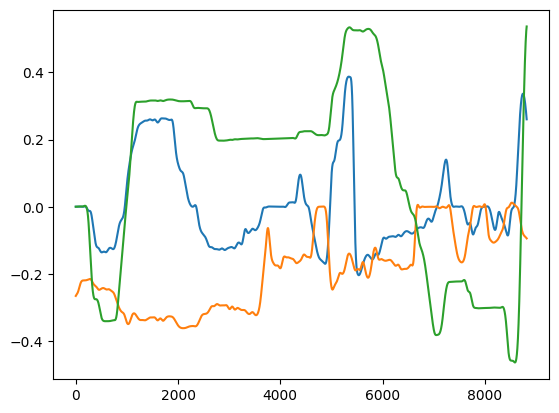

In [30]:
plt.plot(gnd_att_euler)

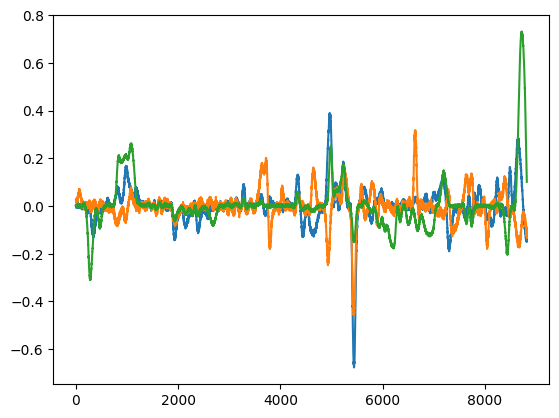

In [31]:
plt.plot(imu_gyr)

In [67]:
import numpy as np

imu_sumdiv = int(np.floor(acc.shape[0]/100))

avg_acc = np.zeros(shape=(imu_sumdiv+1,3))
avg_acc[0,:] = acc[0,:]
avg_gyr = np.zeros(shape=(imu_sumdiv+1,3))
avg_gyr[0,:] = gyr[0,:]

for i in range(imu_sumdiv):
    avg_acc[i+1,:] = np.average(acc[1+100*i:1+100*(i+1),:], axis=0)
    avg_gyr[i+1,:] = np.average(gyr[1+100*i:1+100*(i+1),:], axis=0)

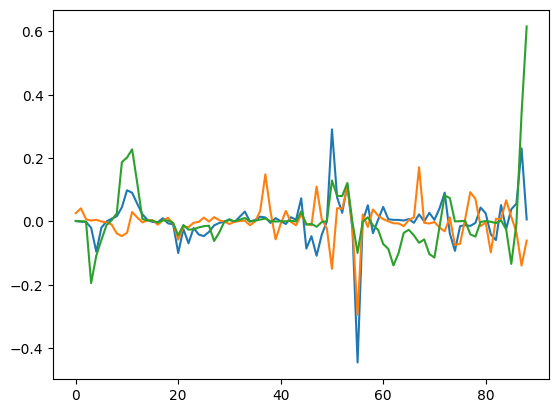

In [68]:
plt.plot(avg_gyr)